# Transform an Excel workbook to a Modelflow model 
An Excel workbook can be transformed to a Modelflow model instance by using `model_Excel.getexcelmodel`. It can not be applied to all excel equations, but equations conforming to modelflows business logic language can be digested. In addition a sum(<range>) will be translated to a modelflow function. 

The function was developed to be used on a woorkbook from the Danish FSA (Financial Supervisor). The workbook calculates the [Liquidity Coverage Ratio](https://www.eba.europa.eu/regulation-and-policy/liquidity-risk) for a bank . However be aware that this particular workbook is outdated and **only** used for illustration. 
    
Also the input data are not in the public domain. So only the model is shown and used in this notebook.

The excel workbook is located [here](https://github.com/IbHansen/modelflow-manual/blob/main/papers/addbook/content/onboard%20Excel/lcrberegning2.xlsx)     


## Import the function which does the trick

In [1]:
from model_Excel import getexcelmodel 

## Create the model from the `.xlsx` file
A instance of the model class is created and also a list of the parameters in the file. 

Cells will be named

 > _\<sheet name>_\<column>\<row>


In [2]:
mmodel,para = getexcelmodel('lcrberegning2.xlsx')

In [3]:
# Set a few descriptions 
mmodel.var_description= {
'_LCR_C62'  : 'LCR',
'_LCR_C59':'Total net outflows',
'_LCR_C25':'Total Liquid assets after adjustment',
 
}

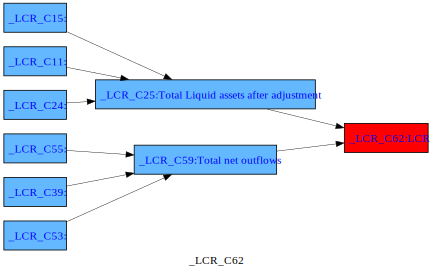

In [4]:
mmodel.draw('_LCR_C62',up=2,down=1,HR=0)  # The LCR 


### The model is recursive 
As the model's origin is Excel there are no circular references. So the model will just be [topological sorted](https://en.wikipedia.org/wiki/Topological_sorting)  and then calculated in the sorted sequence. 

In [5]:
mmodel.istopo

True

The topological sorted order in which the model has to be calculated is stored in the list `.solveorder`. Below the last 5 elements are shown. As expected the last value to calculate is the lcr ratio. 

In [6]:
mmodel.solveorder[-5:]

['_LCR_C25', '_LCR_C59', '_LCR_C56', '_LCR_C62', '_LCR_C63']

### The equations

In [7]:
print(mmodel.equations)

Frml xx _LCR_C9=SUM_EXCEL(_51_F12,_51_F13,_51_F15,_51_F16,_51_F18,_51_F19,_51_F21,_51_F22,_51_F24,_51_F25*(1-_HAIRCUTS_B4),_51_H7,_51_H9,_51_I27,_51_F33,_51_H33,_51_F55,_51_F56,_51_F57,_51_F69,_51_F70,_51_F71,_51_F72,_51_F73,_51_F74) $ 
Frml xx _LCR_C10=SUM_EXCEL(_51_F39,_51_F51)*(1-_HAIRCUTS_B3) $ 
Frml xx _LCR_C11=SUM_EXCEL(_LCR_C9,_LCR_C10) $ 
Frml xx _LCR_C12=SUM_EXCEL(_51_F40,_51_H40,_51_F52,_51_H52,_51_H39,_51_H51,)*(1-_HAIRCUTS_B5) $ 
Frml xx _LCR_C13=SUM_EXCEL(_51_F35,_51_H35,_51_F76,_51_F77,_51_F78,_51_F79,_51_F80,_51_H76,_51_H77,_51_H78,_51_H79,_51_H80,_51_H69,_51_H70,_51_H71,_51_H72,_51_H73,_51_H74,_51_H59,_51_H60,_51_H61)*(1-_HAIRCUTS_B6)+_51_F26*(1-_HAIRCUTS_B7) $ 
Frml xx _LCR_C14=SUM_EXCEL(_51_F36,_51_F37,_51_H36,_51_H37,_51_F86,_51_H86)*(1-_HAIRCUTS_B9)+SUM_EXCEL(_51_F43,_51_H43,_51_F47,_51_H47)*(1-_HAIRCUTS_B8)+SUM_EXCEL(_51_F41,_51_H41,_51_F53,_51_H53)*(1-_HAIRCUTS_B10) $ 
Frml xx _LCR_C15=SUM_EXCEL(_LCR_C12,_LCR_C13,_LCR_C14) $ 
Frml xx _LCR_C16=_52_AA97-_52_Z128+_53